In [3]:
import numpy as np
import pandas as pd 
import os
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor, LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [5]:
import pandas as pd
import numpy as np
df = pd.read_csv('train.csv')

In [7]:
df

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold
0,1,17/01/11,8091,216418,99.0375,111.8625,0,0,20
1,2,17/01/11,8091,216419,99.0375,99.0375,0,0,28
2,3,17/01/11,8091,216425,133.9500,133.9500,0,0,19
3,4,17/01/11,8091,216233,133.9500,133.9500,0,0,44
4,5,17/01/11,8091,217390,141.0750,141.0750,0,0,52
...,...,...,...,...,...,...,...,...,...
150145,212638,09/07/13,9984,223245,235.8375,235.8375,0,0,38
150146,212639,09/07/13,9984,223153,235.8375,235.8375,0,0,30
150147,212642,09/07/13,9984,245338,357.6750,483.7875,1,1,31
150148,212643,09/07/13,9984,547934,141.7875,191.6625,0,1,12


In [9]:
df[['day','month','year']]=df["week"].str.split('/',expand=True)
df

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold,day,month,year
0,1,17/01/11,8091,216418,99.0375,111.8625,0,0,20,17,01,11
1,2,17/01/11,8091,216419,99.0375,99.0375,0,0,28,17,01,11
2,3,17/01/11,8091,216425,133.9500,133.9500,0,0,19,17,01,11
3,4,17/01/11,8091,216233,133.9500,133.9500,0,0,44,17,01,11
4,5,17/01/11,8091,217390,141.0750,141.0750,0,0,52,17,01,11
...,...,...,...,...,...,...,...,...,...,...,...,...
150145,212638,09/07/13,9984,223245,235.8375,235.8375,0,0,38,09,07,13
150146,212639,09/07/13,9984,223153,235.8375,235.8375,0,0,30,09,07,13
150147,212642,09/07/13,9984,245338,357.6750,483.7875,1,1,31,09,07,13
150148,212643,09/07/13,9984,547934,141.7875,191.6625,0,1,12,09,07,13


In [11]:
df = df.drop("week",axis=1)
df

,record_ID,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold,day,month,year
0,1,8091,216418,99.0375,111.8625,0,0,20,17,01,11
1,2,8091,216419,99.0375,99.0375,0,0,28,17,01,11
2,3,8091,216425,133.9500,133.9500,0,0,19,17,01,11
3,4,8091,216233,133.9500,133.9500,0,0,44,17,01,11
4,5,8091,217390,141.0750,141.0750,0,0,52,17,01,11
...,...,...,...,...,...,...,...,...,...,...,...
150145,212638,9984,223245,235.8375,235.8375,0,0,38,09,07,13
150146,212639,9984,223153,235.8375,235.8375,0,0,30,09,07,13
150147,212642,9984,245338,357.6750,483.7875,1,1,31,09,07,13
150148,212643,9984,547934,141.7875,191.6625,0,1,12,09,07,13


In [13]:
df = df.dropna()
df
print(df.isnull().sum())

record_ID          0
store_id           0
sku_id             0
total_price        0
base_price         0
is_featured_sku    0
is_display_sku     0
units_sold         0
day                0
month              0
year               0
dtype: int64


In [15]:
print("Total units sold:", df['units_sold'].sum())
print("Average units sold per record:", df['units_sold'].mean())
print("Max units sold in a record:", df['units_sold'].max())
print("Min units sold in a record:", df['units_sold'].min())

Total units sold: 7758881
Average units sold per record: 51.674543287001576
Max units sold in a record: 2876
Min units sold in a record: 1


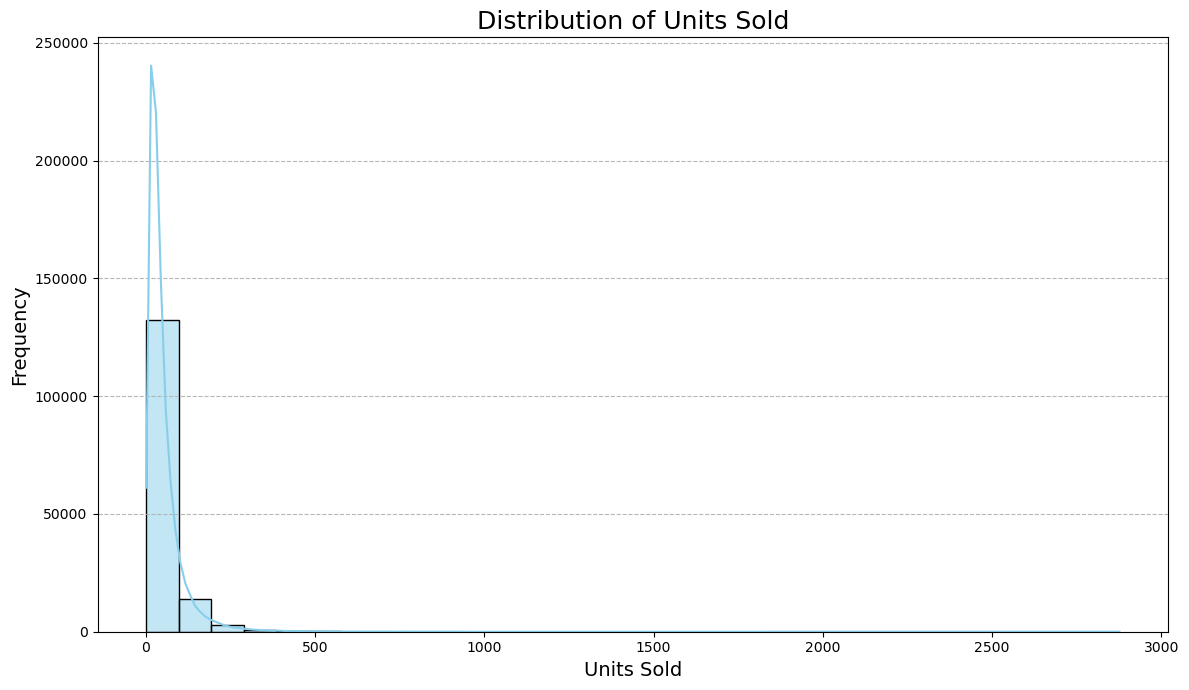

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,7))
sns.histplot(df['units_sold'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Units Sold', fontsize=18)
plt.xlabel('Units Sold', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.9)
plt.tight_layout()  

plt.show()

In [19]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X = df.drop(columns='units_sold', axis=1)
y = df['units_sold']

X_train, X_test, y_train, y_test = train_test_split(X,
                                                  y,
                                                  test_size=0.2,
                                                  random_state=42)

In [21]:
model=RandomForestRegressor(n_jobs=-1)
model.fit(X_train,y_train)

RandomForestRegressor(n_jobs=-1)

In [23]:
model.score(X_test,y_test)

0.7684584430840786

In [25]:
from sklearn.metrics import mean_squared_error
import numpy as np

y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse:.3f}")

RMSE: 27.526


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150149 entries, 0 to 150149
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   record_ID        150149 non-null  int64  
 1   store_id         150149 non-null  int64  
 2   sku_id           150149 non-null  int64  
 3   total_price      150149 non-null  float64
 4   base_price       150149 non-null  float64
 5   is_featured_sku  150149 non-null  int64  
 6   is_display_sku   150149 non-null  int64  
 7   units_sold       150149 non-null  int64  
 8   day              150149 non-null  object 
 9   month            150149 non-null  object 
 10  year             150149 non-null  object 
dtypes: float64(2), int64(6), object(3)
memory usage: 13.7+ MB


In [29]:
df.describe()


,record_ID,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold
count,150149.000000,150149.000000,150149.000000,150149.000000,150149.000000,150149.000000,150149.000000,150149.000000
mean,106270.971795,9199.420935,254761.195226,206.626751,219.424262,0.095612,0.133201,51.674543
std,61385.825580,615.593192,85547.587866,103.308516,110.960204,0.294059,0.339793,60.207962
min,1.000000,8023.000000,216233.000000,41.325000,61.275000,0.000000,0.000000,1.000000
25%,53111.000000,8562.000000,217217.000000,130.387500,133.237500,0.000000,0.000000,20.000000
50%,106226.000000,9371.000000,222087.000000,198.075000,205.912500,0.000000,0.000000,35.000000
75%,159452.000000,9731.000000,245338.000000,233.700000,234.412500,0.000000,0.000000,62.000000
max,212644.000000,9984.000000,679023.000000,562.162500,562.162500,1.000000,1.000000,2876.000000


<Axes: >

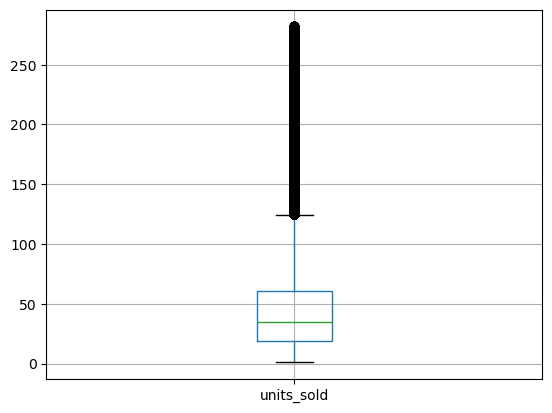

In [63]:
 
df.boxplot(column=['units_sold'])

In [79]:
upper_limit = df['units_sold'].quantile(0.99)
df = df[df['units_sold'] < upper_limit]

<Axes: >

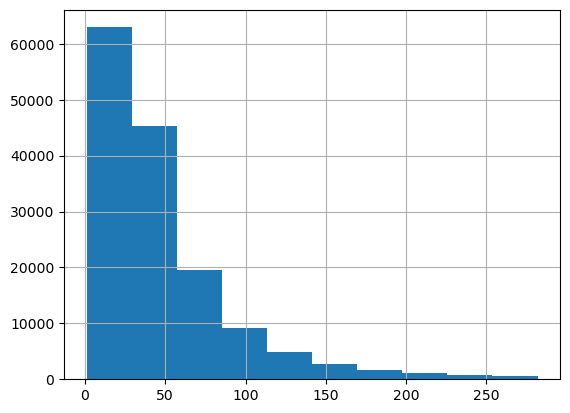

In [77]:
df.units_sold.hist()

In [67]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X = df.drop(columns='units_sold', axis=1)
y = df['units_sold']

X_train, X_test, y_train, y_test = train_test_split(X,
                                                  y,
                                                  test_size=0.2,
                                                  random_state=42)

In [69]:
model=RandomForestRegressor(n_jobs=-1)
model.fit(X_train,y_train)

RandomForestRegressor(n_jobs=-1)

In [70]:
model.score(X_test,y_test)

0.804569254493043

In [71]:
df.drop('record_ID',axis=1)

,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold,day,month,year
0,8091,216418,99.0375,111.8625,0,0,20,17,01,11
1,8091,216419,99.0375,99.0375,0,0,28,17,01,11
2,8091,216425,133.9500,133.9500,0,0,19,17,01,11
3,8091,216233,133.9500,133.9500,0,0,44,17,01,11
4,8091,217390,141.0750,141.0750,0,0,52,17,01,11
...,...,...,...,...,...,...,...,...,...,...
150145,9984,223245,235.8375,235.8375,0,0,38,09,07,13
150146,9984,223153,235.8375,235.8375,0,0,30,09,07,13
150147,9984,245338,357.6750,483.7875,1,1,31,09,07,13
150148,9984,547934,141.7875,191.6625,0,1,12,09,07,13


In [81]:
df=df.join(pd.get_dummies(df.store_id,prefix="store")).drop("store_id",axis=1)
df=df.join(pd.get_dummies(df.sku_id,prefix="item")).drop("sku_id",axis=1)

In [83]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X = df.drop(columns='units_sold', axis=1)
y = df['units_sold']

X_train, X_test, y_train, y_test = train_test_split(X,
                                                  y,
                                                  test_size=0.2,
                                                  random_state=42)

In [86]:
model=RandomForestRegressor(n_jobs=-1)
model.fit(X_train,y_train)

RandomForestRegressor(n_jobs=-1)

In [96]:
model.score(X_test,y_test)
y_pred = model.predict(X_test)  # MUST match size of y_test

In [90]:
df

,record_ID,total_price,base_price,is_featured_sku,is_display_sku,units_sold,day,month,year,store_8023,...,item_320485,item_327492,item_378934,item_398721,item_545621,item_546789,item_547934,item_600934,item_673209,item_679023
0,1,99.0375,111.8625,0,0,20,17,01,11,False,...,False,False,False,False,False,False,False,False,False,False
1,2,99.0375,99.0375,0,0,28,17,01,11,False,...,False,False,False,False,False,False,False,False,False,False
2,3,133.9500,133.9500,0,0,19,17,01,11,False,...,False,False,False,False,False,False,False,False,False,False
3,4,133.9500,133.9500,0,0,44,17,01,11,False,...,False,False,False,False,False,False,False,False,False,False
4,5,141.0750,141.0750,0,0,52,17,01,11,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150145,212638,235.8375,235.8375,0,0,38,09,07,13,False,...,False,False,False,False,False,False,False,False,False,False
150146,212639,235.8375,235.8375,0,0,30,09,07,13,False,...,False,False,False,False,False,False,False,False,False,False
150147,212642,357.6750,483.7875,1,1,31,09,07,13,False,...,False,False,False,False,False,False,False,False,False,False
150148,212643,141.7875,191.6625,0,1,12,09,07,13,False,...,False,False,False,False,False,False,True,False,False,False


In [98]:
print(y_pred.shape)
print(y_test.shape)


(29425,)
(29425,)


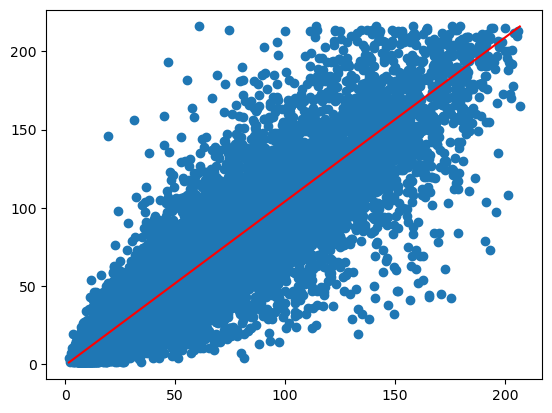

In [100]:
plt.scatter(y_pred,y_test)
plt.plot(np.linspace(y_pred.min(),y_pred.max()),np.linspace(y_test.min(),y_test.max()),color="red")